In [2]:
import pandas as pd
hour = pd.read_csv("hour.csv")
print(hour.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  count  
0           1  0.24  0.2879  0.81        0.0       3          13     16  
1           1  0.22  0.2727  0.80        0.0       8          32     40  
2           1  0.22  0.2727  0.80        0.0       5          27     32  
3           1  0.24  0.2879  0.75        0.0       3          10     13  
4           1  0.24  0.2879  0.75        0.0       0           1      1  


In [3]:
# this what we done till number 4 is called summary statistics and they're useful to check for every dataset you ever work with.
print(hour['count'].mean())

189.46308763450142


In [4]:
print(hour['count'].median())
print(hour['count'].std())
print(hour['registered'].min())
print(hour['registered'].max())

142.0
181.38759909186527
0
886


In [5]:
print(hour['casual'].min())
print(hour['casual'].max())

0
367


In [6]:
print(hour.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

In [7]:
print(hour.loc[3,'count']) # this means we want to select row 3 of our data and the count column.

13


In [8]:
print(hour.loc[2:4,'registered'])

2    27
3    10
4     1
Name: registered, dtype: int64


In [9]:
print(hour.loc[hour['hr']<5,'registered'].mean())

20.7881427367238


In [10]:
print(hour.loc[(hour['hr']<5) & (hour['temp']<.50),'count'].mean())

19.521104742053154


In [11]:
print(hour.loc[(hour['hr']<5) & (hour['temp']>.50),'count'].mean())

33.639322916666664


In [12]:
print(hour.loc[(hour['temp']>0.5) | (hour['hum']>0.5), 'count'].mean())

193.36764103264582


In [13]:
#seasonal data, 1 is for winter, 2 for spring, 3 for summer, and 4 for fall.
print(hour.groupby(['season'])['count'].mean())

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: count, dtype: float64


In [14]:
# 0 is non-holidays
# 1 is holidays
print(hour.groupby(['season','holiday'])['count'].mean())

season  holiday
1       0          112.685875
        1           72.042683
2       0          208.428472
        1          204.552083
3       0          235.976818
        1          237.822917
4       0          199.965998
        1          167.722222
Name: count, dtype: float64


In [15]:
''' this dataset is big, and there's no end to the different ways it can be examined. we ve begun
to look at a few subsets related to all the columns and explore many perspectives on the data.
even without doing advanced statistics and machine learning, you can learn a great deal and get many useful ideas'''

" this dataset is big, and there's no end to the different ways it can be ecamined. we ve begun\nto look at a few subsets related to all the columns and explore many perspectives on the data.\neven without doing advanced statistics and machine learning, you can learn a great deal and get many useful ideas"

In [16]:
'''summary statistics are valuabe and useful for exploration. however, there s an exteremely important part of 
exploratory data analysis that we haven't done yet: plotting or visualizing the data in organized charts.'''

"summary statistics are valuabe and useful for exploration. however, there s an exteremely important part of \nexploratory data analysis that we haven't done yet: plotting or visualizing the data in organized charts."

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x = hour['instant'], y = hour['count'])

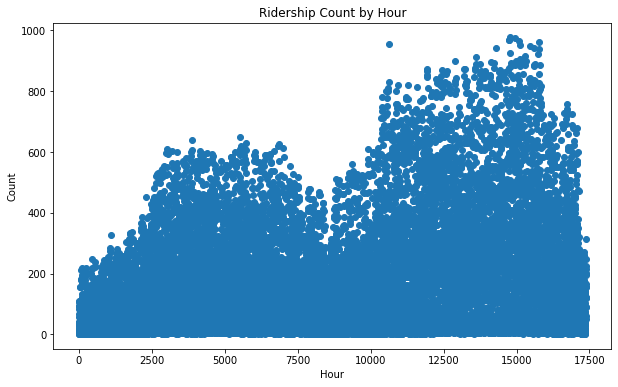

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=hour['instant'], y=hour['count'])
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Ridership Count by Hour")
plt.show()

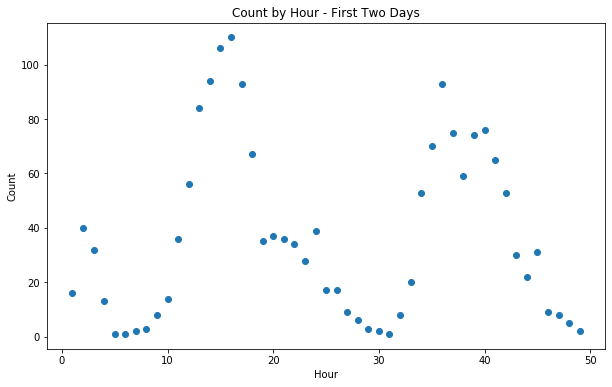

In [19]:
#plotting subsets of data
hour_first48 = hour.loc[0:48,:]
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x = hour_first48['instant'], y = hour_first48['count'])
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Count by Hour - First Two Days")
plt.show()

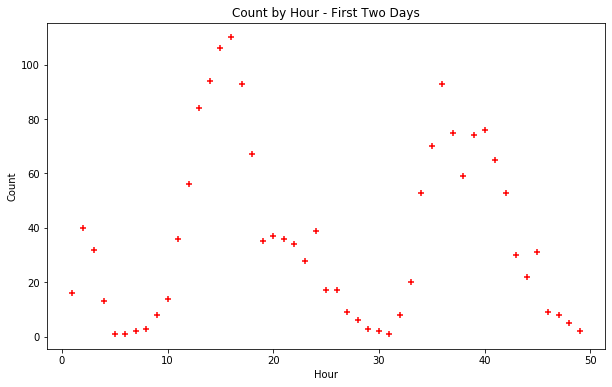

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter( x = hour_first48['instant'], y = hour_first48['count'], c='red', marker='+')
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Count by Hour - First Two Days")
plt.show()

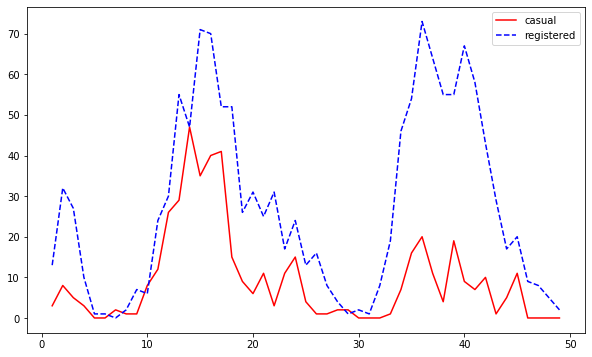

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hour_first48['instant'], hour_first48['casual'], c = 'red', label='casual',linestyle='-')
ax.plot(hour_first48['instant'], hour_first48['registered'],c='blue',label='registered', linestyle='--')
ax.legend()
plt.show()

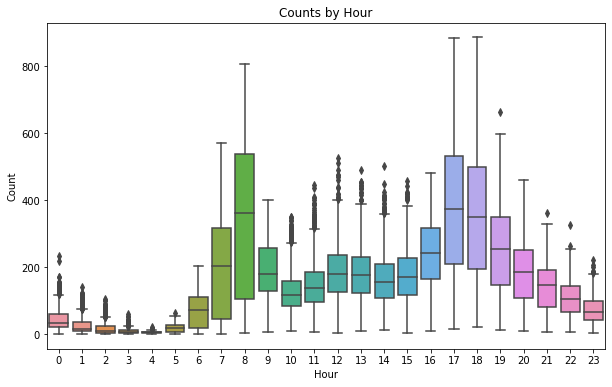

In [22]:
#box plots showing ridership counts grouped by the hour of the day.
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x='hr', y='registered', data=hour)
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Counts by Hour")
plt.show()

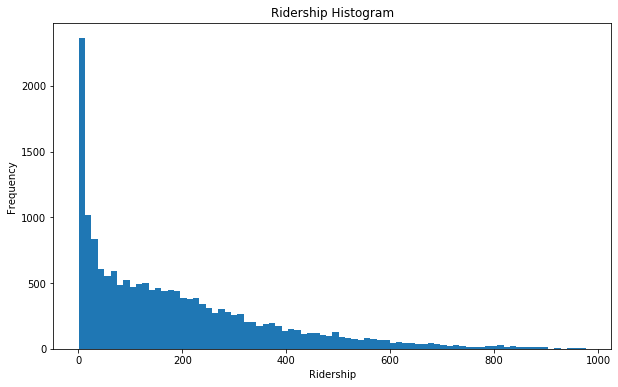

In [23]:
#histogram
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(hour['count'],bins=80)
plt.xlabel("Ridership")
plt.ylabel("Frequency")
plt.title("Ridership Histogram")
plt.show()

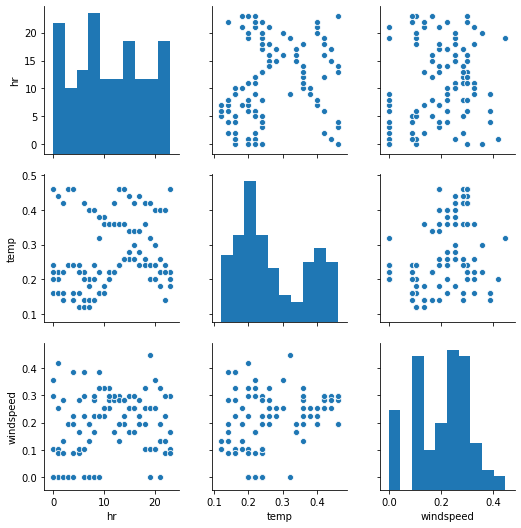

In [24]:
thevariables = ['hr','temp','windspeed']
hour_first100 = hour.loc[0:100,thevariables]
sns.pairplot(hour_first100)

In [25]:
#correlations
print(hour['casual'].corr(hour['registered']))
print(hour['temp'].corr(hour['hum']))

0.5066177004294637
-0.06988139105119355


In [26]:
#correlation matrix
thenames = ['hr','temp','windspeed']
cor_matrix = hour[thenames].corr()
print(cor_matrix)

                 hr      temp  windspeed
hr         1.000000  0.137603   0.137252
temp       0.137603  1.000000  -0.023125
windspeed  0.137252 -0.023125   1.000000


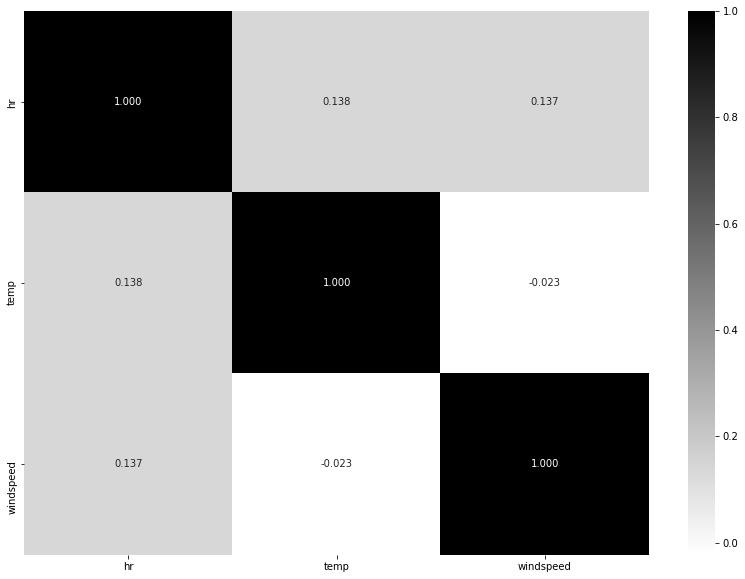

In [27]:
#heat map
plt.figure(figsize=(14,10))
corr = hour[thenames].corr()
sns.heatmap(corr, annot=True,cmap='binary',fmt=".3f", xticklabels=thenames,yticklabels=thenames)
plt.show()

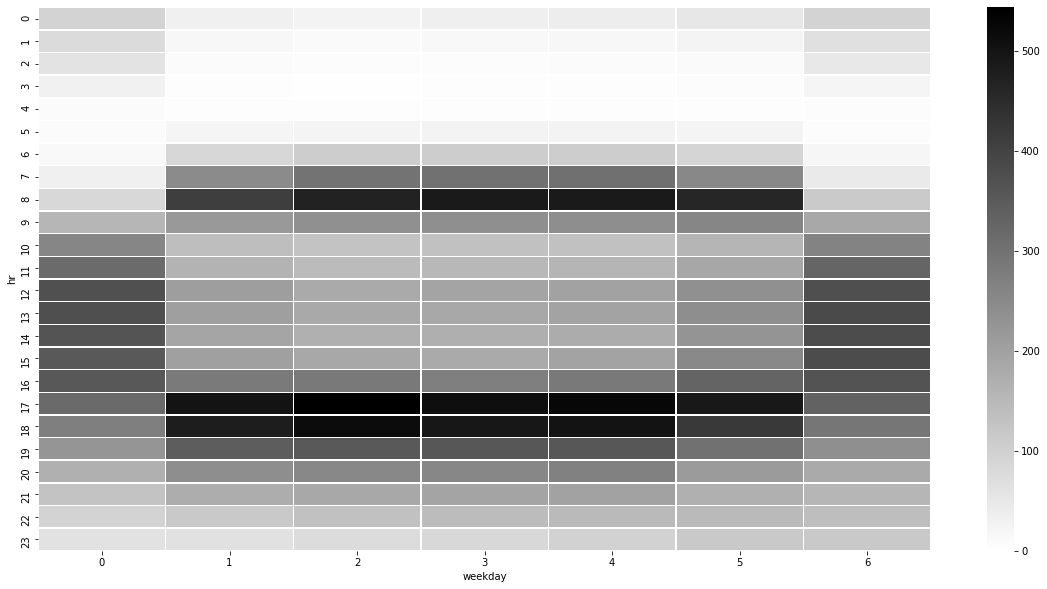

In [28]:
df_hm = hour.pivot_table(index='hr', columns='weekday', values='count')
plt.figure(figsize=(20,10))
sns.heatmap(df_hm, fmt="d", cmap="binary",linewidths=.5, vmin=0)
plt.show()